Roy Noviantho 

---


Fresh Graduate Academy (FGA) 

---


Machine Learning

---


Machine Learning - IBM

---


No. Registrasi : 0182180141-83

KAGGLE

In [1]:
from google.colab import files
!pip install -q kaggle

In [2]:
#upload api key
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
! mkdir ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d viratkothari/animal10

 97% 568M/585M [00:05<00:00, 153MB/s]
100% 585M/585M [00:05<00:00, 111MB/s]


In [7]:
#import all 
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
#ekstrasi file zip
local_zip = '/content/animal10.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

DATASET CONF

In [18]:
folder_path = '/tmp/Animals-10'
print("Isi folder awal: ",os.listdir(folder_path))
#menghapus folder yang tidak digunakan
del_folder = ['elephant','sheep','squirrel','cat','chicken','horse','cow']
for enum in del_folder:
  shutil.rmtree(folder_path+"/"+enum)
print("Isi folder sekarang: ",os.listdir(folder_path))

Isi folder awal:  ['elephant', 'sheep', 'dog', 'squirrel', 'cat', 'butterfly', 'chicken', 'horse', 'cow', 'spider']
Isi folder sekarang:  ['dog', 'butterfly', 'spider']


In [23]:
dog_data = os.listdir("/tmp/Animals-10/dog")
print("Total Gambar Anjing: ", len(dog_data))
butterfly_data = os.listdir("/tmp/Animals-10/butterfly")
print("Total Gambar Kupu-Kupu: ", len(butterfly_data))
spider_data = os.listdir("/tmp/Animals-10/spider")
print("Total Gambar Laba-laba:", len(spider_data))

#definisi lokasi masing-masing data
dog_dir          = os.path.join(folder_path,"dog")
butterfly_dir    = os.path.join(folder_path,"butterfly")
spider_dir       = os.path.join(folder_path,"spider")
train_dir        = os.path.join(folder_path,"train")
validation_dir   = os.path.join(folder_path,"val")

Total Gambar Anjing:  4863
Total Gambar Kupu-Kupu:  2112
Total Gambar Laba-laba: 4821


In [26]:
#membuat folder menyimpan data train dan va
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

In [25]:
#split data setiap kategori
train_dog, val_dog                = train_test_split(os.listdir(dog_dir),test_size=0.2)
print('Jumlah Train Anjing  :' , len(train_dog))
print('Jumlah Val Anjing    :' , len(val_dog))
train_butterfly, val_butterfly    = train_test_split(os.listdir(butterfly_dir),test_size=0.2)
print('Jumlah Train Kupu-Kupu  :' , len(train_butterfly))
print('Jumlah Val Kupu-Kupu    :' , len(val_butterfly))
train_spider, val_spider    = train_test_split(os.listdir(spider_dir),test_size=0.2)
print('Jumlah Train Laba-Laba  :' , len(train_spider))
print('Jumlah Val Laba-Laba    :' , len(val_spider))

Jumlah Train Anjing  : 3890
Jumlah Val Anjing    : 973
Jumlah Train Kupu-Kupu  : 1689
Jumlah Val Kupu-Kupu    : 423
Jumlah Train Laba-Laba  : 3856
Jumlah Val Laba-Laba    : 965


In [27]:
#membuat folder dalam data train dan val untuks setiap kategori 
dir_train_dog        = os.path.join(train_dir,"dog")
dir_train_butterfly  = os.path.join(train_dir,"butterfly")
dir_train_spider     = os.path.join(train_dir,"spider")

dir_val_dog          = os.path.join(validation_dir,"dog")
dir_val_butterfly    = os.path.join(validation_dir,"butterfly")
dir_val_spider       = os.path.join(validation_dir,"spider")

if not os.path.exists(dir_train_dog):
  os.mkdir(dir_train_dog)
if not os.path.exists(dir_train_butterfly):
  os.mkdir(dir_train_butterfly)
if not os.path.exists(dir_train_spider):
  os.mkdir(dir_train_spider)

if not os.path.exists(dir_val_dog):
  os.mkdir(dir_val_dog)
if not os.path.exists(dir_val_butterfly):
  os.mkdir(dir_val_butterfly)
if not os.path.exists(dir_val_spider):
  os.mkdir(dir_val_spider)

In [28]:
#copy data hasil split ke dalam setiap folder data train dan test sesuai masing-masing kategori
for data in train_dog:
  shutil.copy(os.path.join(dog_dir,data), os.path.join(dir_train_dog,data))
for data in train_butterfly:
  shutil.copy(os.path.join(butterfly_dir,data), os.path.join(dir_train_butterfly,data))
for data in train_spider:
  shutil.copy(os.path.join(spider_dir,data), os.path.join(dir_train_spider,data))

for data in val_dog:
  shutil.copy(os.path.join(dog_dir,data), os.path.join(dir_val_dog, data))
for data in val_butterfly:
  shutil.copy(os.path.join(butterfly_dir,data), os.path.join(dir_val_butterfly, data))
for data in val_spider:
  shutil.copy(os.path.join(spider_dir,data), os.path.join(dir_val_spider, data))

In [49]:
#data generator

train_datagen = ImageDataGenerator(
                                    rescale         = 1./255,
                                    rotation_range  = 20,
                                    horizontal_flip = True,
                                    shear_range     = 0.2,
                                    fill_mode       = 'nearest'
                                  )

val_datagen = ImageDataGenerator(
                                    rescale         = 1./255,
                                    rotation_range  = 20,
                                    horizontal_flip = True,
                                    shear_range     = 0.2,
                                    fill_mode       = 'nearest'
                                  )
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (150,150),
                                                    batch_size  = 64,
                                                    class_mode  = 'categorical'
                                                  )
validation_generator = val_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size = (150,150),
                                                    batch_size  = 64,
                                                    class_mode  = 'categorical'
                                                  )

Found 9435 images belonging to 3 classes.
Found 2361 images belonging to 3 classes.


In [42]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92 ):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [50]:
#menggunakan empat konvulusi
model = tf.keras.models.Sequential([
                                    #konv pertama atau input
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #konv kedua
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #konv ketiga
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #konv keempat
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #ouput
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                  ])


In [51]:
#compile model dengan 'adam' optimizer loss function categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy']
             )
history = model.fit(
                  train_generator,
                  steps_per_epoch = 25,
                  epochs = 50,
                  validation_data = validation_generator,
                  validation_steps = 5,
                  batch_size=64,
                  verbose = 2,
                  callbacks = [callbacks]
                )

Epoch 1/50
25/25 - 111s - loss: 1.0634 - accuracy: 0.4094 - val_loss: 1.0112 - val_accuracy: 0.4625
Epoch 2/50
25/25 - 109s - loss: 0.9364 - accuracy: 0.5256 - val_loss: 0.8982 - val_accuracy: 0.5312
Epoch 3/50
25/25 - 106s - loss: 0.7887 - accuracy: 0.6520 - val_loss: 0.7200 - val_accuracy: 0.6781
Epoch 4/50
25/25 - 110s - loss: 0.7296 - accuracy: 0.6631 - val_loss: 0.6376 - val_accuracy: 0.7531
Epoch 5/50
25/25 - 107s - loss: 0.7089 - accuracy: 0.6859 - val_loss: 0.5854 - val_accuracy: 0.7688
Epoch 6/50
25/25 - 109s - loss: 0.6245 - accuracy: 0.7356 - val_loss: 0.6371 - val_accuracy: 0.7406
Epoch 7/50
25/25 - 107s - loss: 0.6257 - accuracy: 0.7441 - val_loss: 0.6405 - val_accuracy: 0.7500
Epoch 8/50
25/25 - 109s - loss: 0.5998 - accuracy: 0.7531 - val_loss: 0.6519 - val_accuracy: 0.7125
Epoch 9/50
25/25 - 109s - loss: 0.5682 - accuracy: 0.7844 - val_loss: 0.5437 - val_accuracy: 0.7844
Epoch 10/50
25/25 - 109s - loss: 0.5098 - accuracy: 0.7994 - val_loss: 0.6294 - val_accuracy: 0.7219

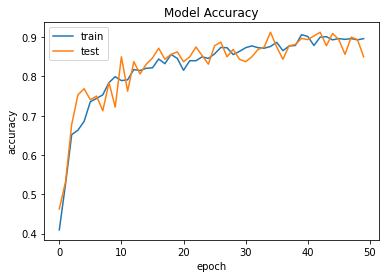

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

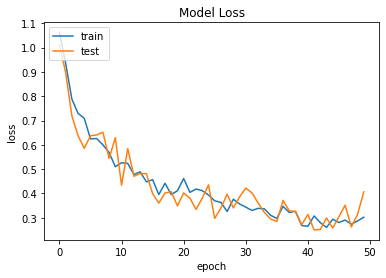

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpw55aln0n/assets
